In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from filterpy.kalman import KalmanFilter

# Train-test(7-3)

In [58]:
# Load the data
df = pd.read_csv('nike.csv', header=0, parse_dates=[0], index_col=0)
df = df[['Close']].dropna().reset_index(drop=True)
# Train-test split
train_size = int(0.7 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

In [59]:
# Initialize KalmanFilter
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.F = np.array([[1, 1], [0, 1]])
kf.H = np.array([[1, 0]])
kf.Q = np.array([[0.001, 0], [0, 0.001]])
kf.R = np.array([[0.1]])
kf.P *= 1000

In [60]:
# Apply Kalman Filter on training data
filtered_train_state_means = []
for _ in range(len(train_data)):
    kf.predict()
    filtered_train_state_means.append(kf.x[0, 0])

for price in train_data['Close'].values:
    kf.update(np.array([[price]]))

# Apply Kalman Filter on test data and predict next 30 days
filtered_test_state_means = []
predictions = []
for price in test_data['Close'].values:
    kf.predict()
    filtered_test_state_means.append(kf.x[0, 0])
    predictions.append(kf.x[0, 0])
    kf.update(np.array([[price]]))

predictions_30_days = []
for _ in range(30):
    kf.predict()
    predictions_30_days.append(kf.x[0, 0])

In [61]:
# Calculate Metrics
mse = np.mean((predictions - test_data['Close'].values) ** 2)
rmse = np.sqrt(np.mean((predictions - test_data['Close'].values)**2))
mape = np.mean(np.abs((predictions - test_data['Close'].values) / test_data['Close'].values)) * 100
mae = np.mean(np.abs(predictions - test_data['Close'].values))
print('MSE:', mse)
print(' RMSE:', rmse)
print(' MAPE:', mape)
print(' MAE:', mae)

MSE: 9.723680533296506
 RMSE: 3.1182816635603183
 MAPE: 2.0749404640160494
 MAE: 2.2334267295830803


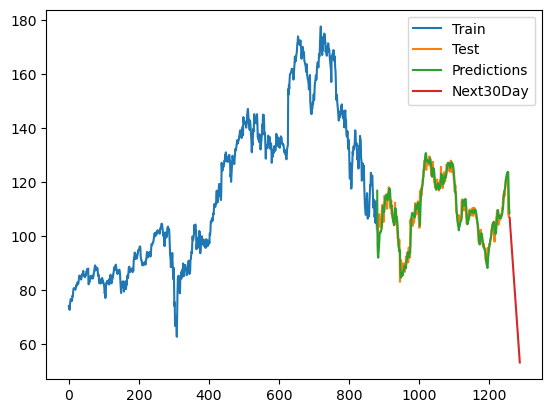

In [62]:
# Plot the results
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, predictions)
plt.plot(range(test_data.index[-1] + 1, test_data.index[-1] + 31), predictions_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()

# Train-test(8-2)

In [63]:
# Train-test split
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

In [64]:
# Apply Kalman Filter on training data
filtered_train_state_means = []
for _ in range(len(train_data)):
    kf.predict()
    filtered_train_state_means.append(kf.x[0, 0])

for price in train_data['Close'].values:
    kf.update(np.array([[price]]))

# Apply Kalman Filter on test data and predict next 30 days
filtered_test_state_means = []
predictions = []
for price in test_data['Close'].values:
    kf.predict()
    filtered_test_state_means.append(kf.x[0, 0])
    predictions.append(kf.x[0, 0])
    kf.update(np.array([[price]]))

predictions_30_days = []
for _ in range(30):
    kf.predict()
    predictions_30_days.append(kf.x[0, 0])

In [65]:
# Calculate Metrics
mse = np.mean((predictions - test_data['Close'].values) ** 2)
rmse = np.sqrt(np.mean((predictions - test_data['Close'].values)**2))
mape = np.mean(np.abs((predictions - test_data['Close'].values) / test_data['Close'].values)) * 100
mae = np.mean(np.abs(predictions - test_data['Close'].values))
print(' MSE:', mse)
print(' RMSE:', rmse)
print(' MAPE:', mape)
print(' MAE:', mae)

 MSE: 5.950392803377897
 RMSE: 2.4393426990437193
 MAPE: 1.6131102511300701
 MAE: 1.7967194252264378


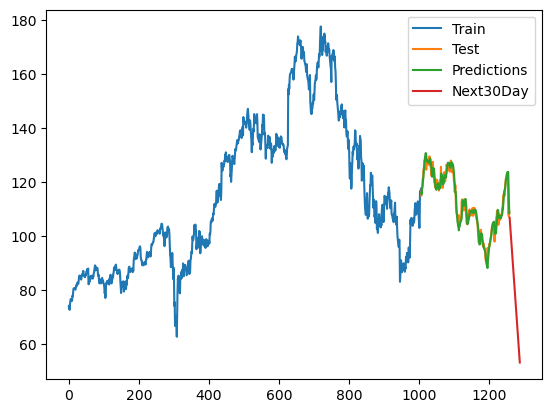

In [66]:
# Plot the predictions graph
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, predictions)
plt.plot(range(test_data.index[-1] + 1, test_data.index[-1] + 31), predictions_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()

# Train-test(9-1)

In [67]:
# Train-test split
train_size = int(0.9 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

In [68]:
# Apply Kalman Filter on training data
filtered_train_state_means = []
for _ in range(len(train_data)):
    kf.predict()
    filtered_train_state_means.append(kf.x[0, 0])

for price in train_data['Close'].values:
    kf.update(np.array([[price]]))

# Apply Kalman Filter on test data and predict next 30 days
filtered_test_state_means = []
predictions = []
for price in test_data['Close'].values:
    kf.predict()
    filtered_test_state_means.append(kf.x[0, 0])
    predictions.append(kf.x[0, 0])
    kf.update(np.array([[price]]))

predictions_30_days = []
for _ in range(30):
    kf.predict()
    predictions_30_days.append(kf.x[0, 0])

In [69]:
# Calculate Metrics
mse = np.mean((predictions - test_data['Close'].values) ** 2)
rmse = np.sqrt(np.mean((predictions - test_data['Close'].values)**2))
mape = np.mean(np.abs((predictions - test_data['Close'].values) / test_data['Close'].values)) * 100
mae = np.mean(np.abs(predictions - test_data['Close'].values))
print(' MSE:', mse)
print(' RMSE:', rmse)
print(' MAPE:', mape)
print(' MAE:', mae)

 MSE: 8.062626713113458
 RMSE: 2.8394764857475856
 MAPE: 1.835481753993066
 MAE: 1.9270142257305956


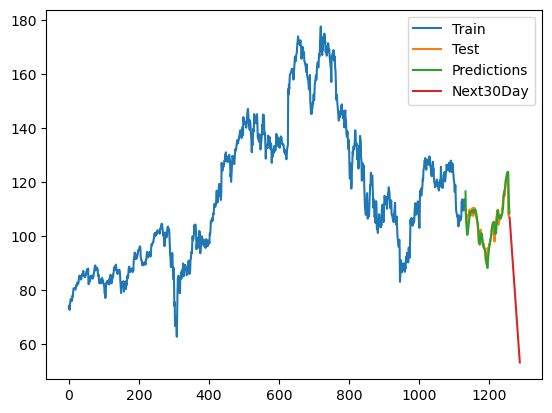

In [70]:
# Plot the results
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, predictions)
plt.plot(range(test_data.index[-1] + 1, test_data.index[-1] + 31), predictions_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()